In [10]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import joblib

In [11]:
df = pd.read_csv("data/GPBUSD.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1057 non-null   object 
 1   Open    1057 non-null   float64
 2   High    1057 non-null   float64
 3   Low     1057 non-null   float64
 4   Close   1057 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.4+ KB


In [12]:
df.isnull().sum()
symbol = 'GBPUSD=X'

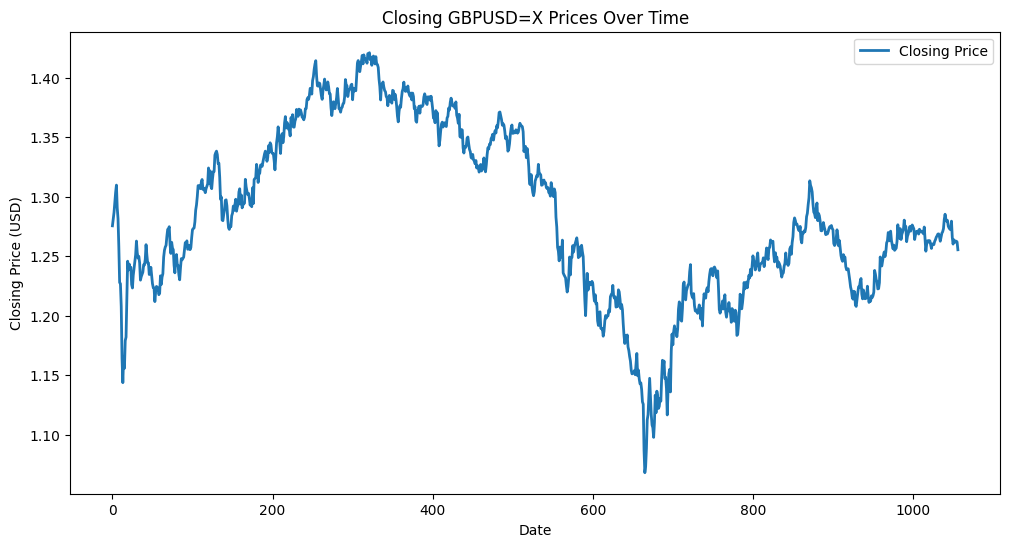

In [13]:
# Line plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label=f'Closing Price', linewidth=2)
plt.title(f'Closing {symbol} Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [14]:
candlestick = go.Figure(data=[go.Candlestick(x=df.index,
                                              open=df['Open'],
                                              high=df['High'],
                                              low=df['Low'],
                                              close=df['Close'])])

candlestick.update_layout(title=f'{symbol} Candlestick Chart',
                          xaxis_title='Date',
                          yaxis_title='Stock Price (USD)',
                          xaxis_rangeslider_visible=False)

candlestick.show()

fig = go.Figure()
fig.write_image("graphSample1.png")

from what we have seen we can use the same data "if trained" for bigger time series but if we use  this 1day time series fotr the model we fear it will be less effective on smaller or bigger tiime series so we will be using yfaince to get a smaller time series

From here on we will be using the 15m time series but from a month 

In [15]:
import yfinance as yf

gusd_data = yf.download(tickers=symbol, period="1mo", interval="15m")

print(gusd_data)


[*********************100%***********************]  1 of 1 completed

                         Open      High       Low     Close  Adj Close  Volume
Datetime                                                                      
2024-09-09 00:00:00  1.313594  1.313698  1.313525  1.313560   1.313560       0
2024-09-09 00:15:00  1.313508  1.313802  1.313508  1.313802   1.313802       0
2024-09-09 00:30:00  1.313767  1.313784  1.313663  1.313750   1.313750       0
2024-09-09 00:45:00  1.313681  1.313767  1.313198  1.313198   1.313198       0
2024-09-09 01:00:00  1.313077  1.313888  1.313077  1.313888   1.313888       0
...                       ...       ...       ...       ...        ...     ...
2024-10-08 10:30:00  1.309552  1.309775  1.309072  1.309243   1.309243       0
2024-10-08 10:45:00  1.309346  1.309552  1.309055  1.309500   1.309500       0
2024-10-08 11:00:00  1.309569  1.309895  1.309569  1.309878   1.309878       0
2024-10-08 11:15:00  1.309809  1.309895  1.309397  1.309603   1.309603       0
2024-10-08 11:30:00  1.309672  1.309912  1.309415  1

In [16]:
df2 = pd.DataFrame(gusd_data)
df2.to_csv('gusd.csv', index = False)

In [17]:
df2 = pd.read_csv('data/gusd.csv')
df2.head()

,Open,High,Low,Close,Adj Close,Volume
0,1.313594,1.313698,1.313525,1.313560,1.313560,0
1,1.313508,1.313802,1.313508,1.313802,1.313802,0
2,1.313767,1.313784,1.313663,1.313750,1.313750,0
3,1.313681,1.313767,1.313198,1.313198,1.313198,0
4,1.313077,1.313888,1.313077,1.313888,1.313888,0


In [18]:
drop1 = ['Adj Close', 'Volume']
df2.drop(columns= drop1, inplace= True)
df2.head()

,Open,High,Low,Close
0,1.313594,1.313698,1.313525,1.313560
1,1.313508,1.313802,1.313508,1.313802
2,1.313767,1.313784,1.313663,1.313750
3,1.313681,1.313767,1.313198,1.313198
4,1.313077,1.313888,1.313077,1.313888


In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2035 non-null   float64
 1   High    2035 non-null   float64
 2   Low     2035 non-null   float64
 3   Close   2035 non-null   float64
dtypes: float64(4)
memory usage: 63.7 KB


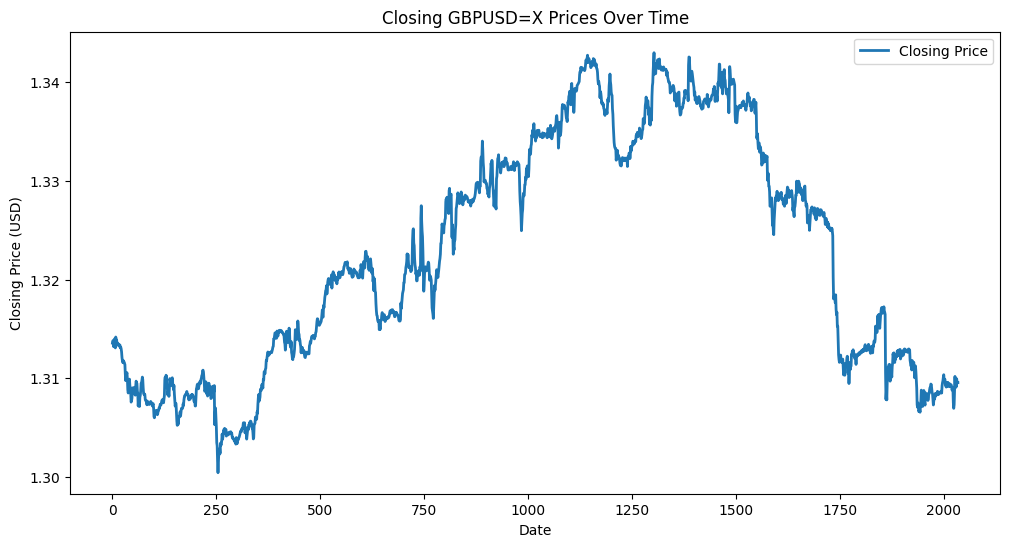

In [20]:
# Line plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(df2['Close'], label=f'Closing Price', linewidth=2)
plt.title(f'Closing {symbol} Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [21]:
candlestick = go.Figure(data=[go.Candlestick(x=df2.index,
                                              open=df['Open'],
                                              high=df['High'],
                                              low=df['Low'],
                                              close=df['Close'])])

candlestick.update_layout(title=f'{symbol} Candlestick Chart',
                          xaxis_title='Date',
                          yaxis_title='Stock Price (USD)',
                          xaxis_rangeslider_visible=False)

candlestick.show()

fig = go.Figure()

In [22]:
df2.head()

,Open,High,Low,Close
0,1.313594,1.313698,1.313525,1.313560
1,1.313508,1.313802,1.313508,1.313802
2,1.313767,1.313784,1.313663,1.313750
3,1.313681,1.313767,1.313198,1.313198
4,1.313077,1.313888,1.313077,1.313888
